# Decision Tree
- Decision Tree is a supervised learning algorithm used for both Classification and Regresssion

# TYPES OF ROOT 
## ROOT NODE: 
The topmost node in the tree.(Dataset / Features) 
- (Income>500000)
yes/no

## INTERNAL ROOT: 
These are the nodes which represent conditions/ Decisions. 
- (AGE > 30)
yes/no

## LEAF ROOT:
Final nodes at the end of each branch.

## Step 1
# Import Libraries

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

## Step 2
# Import Dataset

In [2]:
churn = pd.read_csv("customer_churn_dataset-training-master.csv")


## Step 3
# Explore Data

In [3]:
churn.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [4]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


In [5]:
churn.dtypes


CustomerID           float64
Age                  float64
Gender                object
Tenure               float64
Usage Frequency      float64
Support Calls        float64
Payment Delay        float64
Subscription Type     object
Contract Length       object
Total Spend          float64
Last Interaction     float64
Churn                float64
dtype: object

In [6]:
churn.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency',
       'Support Calls', 'Payment Delay', 'Subscription Type',
       'Contract Length', 'Total Spend', 'Last Interaction', 'Churn'],
      dtype='object')

In [7]:
churn['Gender'].unique()

array(['Female', 'Male', nan], dtype=object)

In [9]:
churn.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,440832.0,225398.667955,129531.918550,2.0,113621.75,226125.5,337739.25,449999.0
Age,440832.0,39.373153,12.442369,18.0,29.00,39.0,48.00,65.0
Tenure,440832.0,31.256336,17.255727,1.0,16.00,32.0,46.00,60.0
Usage Frequency,440832.0,15.807494,8.586242,1.0,9.00,16.0,23.00,30.0
Support Calls,440832.0,3.604437,3.070218,0.0,1.00,3.0,6.00,10.0
Payment Delay,440832.0,12.965722,8.258063,0.0,6.00,12.0,19.00,30.0
Total Spend,440832.0,631.616223,240.803001,100.0,480.00,661.0,830.00,1000.0
Last Interaction,440832.0,14.480868,8.596208,1.0,7.00,14.0,22.00,30.0
Churn,440832.0,0.567107,0.495477,0.0,0.00,1.0,1.00,1.0


## Step 4
# Data Preprocessing

In [10]:
churn.isnull().sum()

CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

In [12]:
churn.dropna(inplace= True)

churn.isnull().sum()

In [28]:
churn.dtypes

CustomerID           float64
Age                  float64
Gender                 int32
Tenure               float64
Usage Frequency      float64
Support Calls        float64
Payment Delay        float64
Subscription Type      int32
Contract Length        int32
Total Spend          float64
Last Interaction     float64
Churn                float64
dtype: object

In [27]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for column in churn.columns:
    if churn[column].dtype == 'object':
        churn[column] = le.fit_transform(churn[column])
        

## Step 5
# Train - Test - Split

In [31]:
#split the data (target and feature)

X = churn.drop('Churn', axis = 1) #feature 
y = churn['Churn'] #target 

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)

## Step 6
# Train Model ( Decision Tree Model )

In [33]:
model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, random_state = 42)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

## Step 7
# Evaluate The Model

In [35]:
y_pred = model.predict(X_test)

In [38]:
print("Accuracy",accuracy_score(y_test, y_pred))

Accuracy 0.9917051039697542


In [39]:
print("confusion Matrix",confusion_matrix(y_test, y_pred))

confusion Matrix [[56064  1096]
 [    1 75089]]


In [40]:
print("Classification report",classification_report(y_test, y_pred))

Classification report               precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     57160
         1.0       0.99      1.00      0.99     75090

    accuracy                           0.99    132250
   macro avg       0.99      0.99      0.99    132250
weighted avg       0.99      0.99      0.99    132250



## Step 8
# Visualizations

In [43]:
from sklearn import tree

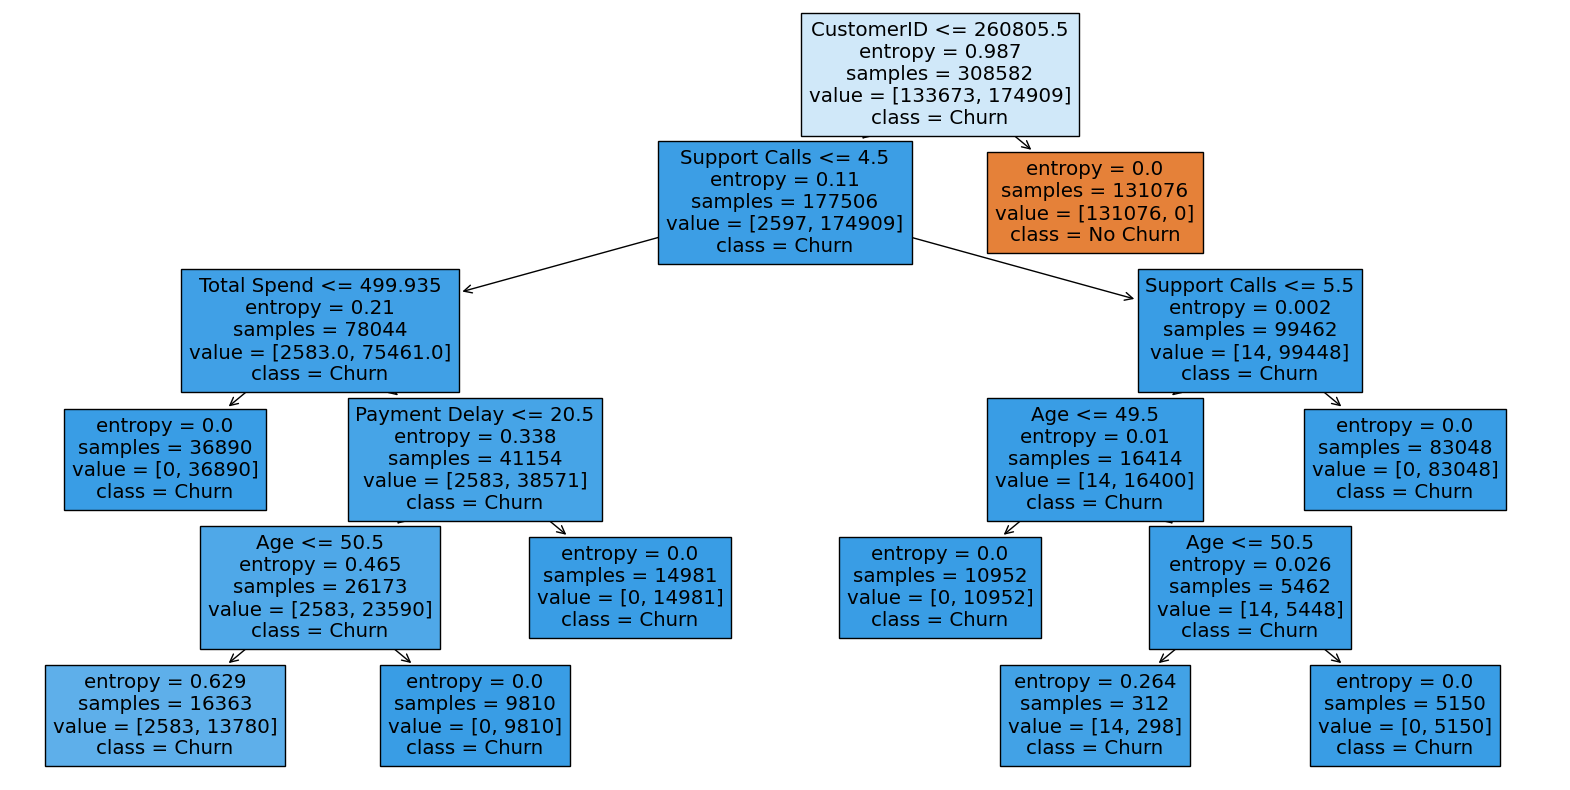

In [44]:
plt.figure(figsize = (20,10))
tree.plot_tree(model,filled = True, feature_names = X.columns, class_names = ["No Churn", "Churn"])
plt.show()

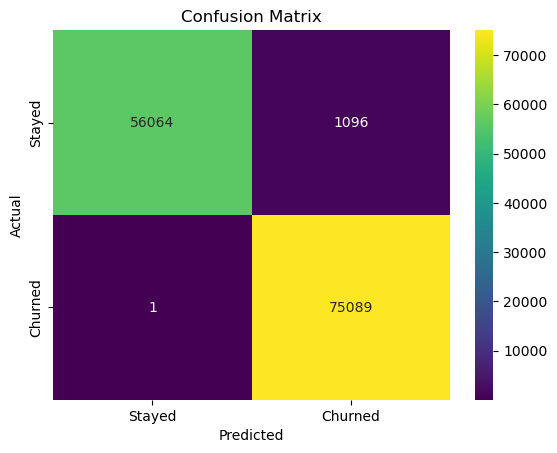

In [45]:

cm = confusion_matrix(y_test, y_pred)

#plot
sns.heatmap(cm, annot = True, fmt = 'd' , cmap = 'viridis', xticklabels = ['Stayed', 'Churned'], yticklabels = ['Stayed','Churned'])

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Homework
- PLot few Grahps
- change entroy to something else
- Change testsize to 0.2